In [50]:
#basic libraries
import pandas as pd
import numpy as np
import re, pprint

#Dimension Reduction Libraries
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD, NMF, PCA,KernelPCA
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans

#Visualizations
import pyLDAvis
import pyLDAvis.sklearn
import seaborn as sns
import matplotlib.pyplot as plt

#NLP Libraries
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize
import spacy




In [51]:
#read in document

path='name_cuisine_nlptopicmodeling.csv'

df = pd.read_csv(path, index_col = 0)

In [52]:
df.head()

,recipeName,cuisine,nlp_ingredients
0,Easy Seafood Paella,spanish,lobster_tail water olive_oil onion spanish_ric...
1,Spanish-style Garlic Shrimp,spanish,i_cant_believe_its_not_butter_spread shrimp sa...
2,Classic Paella,spanish,olive_oil chicken_breast chicken_stock saffron...
3,One Pot Spanish Chicken and Rice,spanish,olive_oil chicken_thighs salt pepper onion gar...
4,Portuguese Fish Stew,spanish,plum_tomatoe savoy_cabbage olive_oil chizo_sau...


In [53]:
df.cuisine.value_counts()

german        778
greek         740
spanish       736
moroccan      731
chinese       727
french        695
american      663
indian        645
italian       644
irish         618
mexican       616
english       610
cuban         551
japanese      548
thai          538
hawaiian      531
hungarian     508
swedish       461
portuguese    193
Name: cuisine, dtype: int64

# A. Preprocessing and Vectorizing Text

In [54]:
stopwords = nltk.corpus.stopwords.words('english')

In [55]:
vectorizer = TfidfVectorizer(analyzer='word',       
                             min_df= 50, max_df = 0.5,                        # minimum read occurences of a word 
                             stop_words= stopwords,             # remove stop words, using a custom list 
                             lowercase=True,                   # convert all words to lowercase
                             token_pattern='[a-zA-Z0-9]{3,}',  # num chars > 3
                             #max_features=500,             # max number of unique words
                            ngram_range = (1,2))

data_vectorized = vectorizer.fit_transform(df['nlp_ingredients'])

In [56]:
#print(X)
df_vectors = pd.DataFrame(vectorizer.idf_, index=vectorizer.get_feature_names(), columns = ['Weight'])
 
# sort ascending

df_word_weights = df_vectors.sort_values(by = 'Weight').reset_index()
df_word_weights

,index,Weight
0,ground,1.873355
1,olive,1.961198
2,olive oil,1.989945
3,chicken,2.059755
4,sauce,2.153041
5,salt pepper,2.458736
6,flour,2.526611
7,water,2.564014
8,beef,2.587485
9,butter,2.590033


# 1. LDA

In [57]:
# Build LDA Model
n_components = 6

lda_model = LatentDirichletAllocation(n_components=n_components,   # Number of topics
                                      max_iter=10,                 # Max learning iterations
                                      learning_method='online',   
                                      random_state=7,            # Random state
                                      #batch_size=128,             # n docs in each learning iter
                                      n_jobs = -1,                 # Use all available CPUs
                                     )
lda_output = lda_model.fit_transform(data_vectorized)

print(lda_model)  # Model attributes

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=6, n_jobs=-1,
                          perp_tol=0.1, random_state=7, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)


In [79]:
lda_model.components_

array([[62.01965282, 15.66251304,  0.16824308, ...,  0.17002319,
         0.16723832,  0.16751441],
       [ 0.16722657,  0.16689005,  0.16966453, ...,  0.166972  ,
         0.16754358, 14.92127139],
       [ 0.16707347,  0.16676434,  1.58960689, ...,  0.16682084,
         0.17054928,  5.75081573],
       [ 0.16726708,  0.16739361,  0.16870589, ...,  0.16689894,
         0.1689204 ,  2.61141606],
       [10.27851637,  2.95845617, 27.36995329, ..., 24.79413992,
        49.51826664, 18.51163648],
       [12.15456406,  1.72896554, 12.8227153 , ...,  0.16705179,
         0.16970125, 31.15687123]])

In [58]:
pyLDAvis.enable_notebook()

panel = pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer, mds='tsne')
panel

/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
0      34.564354 -88.008820       1        1  22.876793
5      30.984182  52.845257       2        1  20.945686
4      83.942497 -16.281210       3        1  19.349919
2       9.891083 -18.163404       4        1  16.248491
1     -51.124065  23.840168       5        1  12.940776
3     -48.911373 -63.212482       6        1   7.638336, topic_info=    Category        Freq              Term       Total  loglift  logprob
55   Default  229.000000  boneless chicken  229.000000  30.0000  30.0000
54   Default  253.000000          boneless  253.000000  29.0000  29.0000
858  Default  263.000000               soy  263.000000  28.0000  28.0000
784  Default  499.000000             sauce  499.000000  27.0000  27.0000
859  Default  261.000000         soy sauce  261.000000  26.0000  26.0000
129  Default  523.000000           chicken  523.000000  25.0000  25.0000
276  Default  155.000000              feta  155.000000  24.0000  24.0000
277  Default  155.000000       feta cheese  155.000000  23.0000  23.0000
119  Default  342.000000            cheese  342.000000  22.0000  22.0000
48   Default  243.000000              bell  243.000000  21.0000  21.0000
49   Default  242.000000       bell pepper  242.000000  20.0000  20.0000
68   Default  125.000000           breasts  125.000000  19.0000  19.0000
131  Default  125.000000   chicken breasts  125.000000  18.0000  18.0000
734  Default  273.000000              rice  273.000000  17.0000  17.0000
216  Default  216.000000             cumin  216.000000  16.0000  16.0000
823  Default  154.000000            sesame  154.000000  15.0000  15.0000
37   Default  348.000000              beef  348.000000  14.0000  14.0000
185  Default  169.000000           coconut  169.000000  13.0000  13.0000
888  Default  289.000000             sugar  289.000000  12.0000  12.0000
349  Default  247.000000            ginger  247.000000  11.0000  11.0000
130  Default  194.000000    chicken breast  194.000000  10.0000  10.0000
63   Default  199.000000            breast  199.000000   9.0000   9.0000
207  Default   83.000000          crumbles   83.000000   8.0000   8.0000
376  Default  302.000000             green  302.000000   7.0000   7.0000
120  Default   82.000000   cheese crumbles   82.000000   6.0000   6.0000
484  Default  200.000000              lime  200.000000   5.0000   5.0000
395  Default  144.000000      ground cumin  144.000000   4.0000   4.0000
169  Default  126.000000              cier  126.000000   3.0000   3.0000
824  Default  111.000000        sesame oil  111.000000   2.0000   2.0000
299  Default  307.000000             flour  307.000000   1.0000   1.0000
..       ...         ...               ...         ...      ...      ...
206   Topic6   28.596967             crumb   29.424955   2.5434  -4.9391
853   Topic6   28.378092            sodium   29.205099   2.5433  -4.9468
67    Topic6   28.131208       breast salt   28.959630   2.5430  -4.9555
59    Topic6   26.212540       bread crumb   27.040037   2.5409  -5.0262
501   Topic6   24.652853          marinara   25.480989   2.5390  -5.0875
502   Topic6   24.652853    marinara sauce   25.480989   2.5390  -5.0875
698   Topic6   23.844846   pitted kalamata   24.670486   2.5380  -5.1208
657   Topic6   22.478644       pepper feta   23.304687   2.5359  -5.1798
894   Topic6   22.828367      sugar starch   23.668717   2.5358  -5.1644
245   Topic6   22.461460         drumstick   23.289394   2.5358  -5.1806
854   Topic6   22.308487    sodium chicken   23.134143   2.5356  -5.1874
477   Topic6   22.052322              less   22.877897   2.5352  -5.1990
55    Topic6  196.287691  boneless chicken  229.210044   2.4169  -3.0128
448   Topic6   56.835008          kalamata   63.092325   2.4675  -4.2523
54    Topic6  192.628771          boneless  253.337186   2.2980  -3.0316
749   Topic6   47.759701              root   54.796305   2.4345  -4.4262
729  

In [59]:
#not getting as much signal as I would like from LDA, will need to try other methods


# 2. NMF

In [60]:
#try using NMF Model

nmf_model = NMF(5)

doc_topic = nmf_model.fit_transform(data_vectorized)

In [61]:
#function for showing top words and topics
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [62]:
display_topics(nmf_model, vectorizer.get_feature_names(), 10)


Topic  0
olive, chicken, olive oil, lemon, bell, bell pepper, parsley, wine, paprika, dried

Topic  1
sauce, soy, soy sauce, sugar, sesame, ginger, rice, sesame oil, chicken, starch

Topic  2
beef, flour, ground, butter, egg, cream, ground beef, carrot, beef broth, bread

Topic  3
ground, cumin, ground cumin, cier, powder, turmeric, cilantro, ginger, cinnamon, ground cier

Topic  4
cheese, parmesan, parmesan cheese, grated, grated parmesan, mzarella, shded, mzarella cheese, pasta, cheddar cheese


In [63]:
topic_word = pd.DataFrame(nmf_model.components_.round(3), index = ['component_1','component_2','component_3','component_4','component_5'], 
                          columns = vectorizer.get_feature_names())
topic_word

,allspice,allspice ground,almond,ange,ange juice,apple,apple cider,apricot,arbio,arbio rice,...,wine water,yeast,yogurt,yogurt lemon,yolk,yolks,yukon,yukon gold,zest,zucchini
component_1,0.000,0.000,0.085,0.208,0.095,0.045,0.030,0.029,0.162,0.162,...,0.030,0.014,0.167,0.038,0.000,0.000,0.034,0.034,0.129,0.193
component_2,0.000,0.000,0.003,0.076,0.033,0.056,0.049,0.000,0.000,0.000,...,0.014,0.004,0.000,0.000,0.000,0.000,0.000,0.000,0.013,0.023
component_3,0.294,0.071,0.004,0.000,0.000,0.120,0.040,0.000,0.000,0.000,...,0.026,0.028,0.000,0.000,0.061,0.109,0.058,0.058,0.000,0.000
component_4,0.079,0.037,0.085,0.162,0.115,0.011,0.002,0.111,0.000,0.000,...,0.000,0.000,0.254,0.041,0.000,0.000,0.004,0.004,0.060,0.026
component_5,0.000,0.000,0.009,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.028,0.055,0.011,0.033,0.012,0.000,0.000,0.005,0.087


# 3. Kmeans


In [64]:
km = KMeans(n_clusters=5, random_state=1)
km.fit(data_vectorized)
predict=km.predict(data_vectorized)

In [65]:
df_kmeans = df.copy()
df_kmeans['cluster'] = pd.Series(predict, index=df.index)

In [66]:
df_kmeans.head()

,recipeName,cuisine,nlp_ingredients,cluster
0,Easy Seafood Paella,spanish,lobster_tail water olive_oil onion spanish_ric...,4
1,Spanish-style Garlic Shrimp,spanish,i_cant_believe_its_not_butter_spread shrimp sa...,4
2,Classic Paella,spanish,olive_oil chicken_breast chicken_stock saffron...,4
3,One Pot Spanish Chicken and Rice,spanish,olive_oil chicken_thighs salt pepper onion gar...,4
4,Portuguese Fish Stew,spanish,plum_tomatoe savoy_cabbage olive_oil chizo_sau...,4


In [67]:
df_cluster_dist = pd.DataFrame(df_kmeans['cluster'].value_counts()) #convert to dataframe

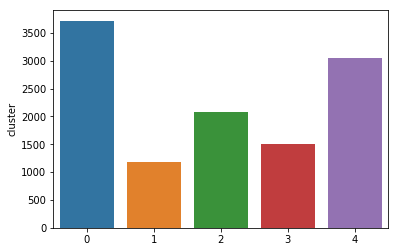

In [68]:
sns.barplot(x= df_cluster_dist.index, y= 'cluster', data=df_cluster_dist) #making sure we have good represntation across clusters

In [69]:
df_cluster_0 = df_kmeans[df_kmeans['cluster'] == 0]['cuisine'].value_counts() #checking out distribution of cuisines per cluster

df_cluster_0 = pd.DataFrame(df_cluster_0)

df_cluster_0

,cuisine
german,710
irish,577
english,493
french,447
swedish,440
hungarian,402
american,280
italian,62
portuguese,53
hawaiian,48


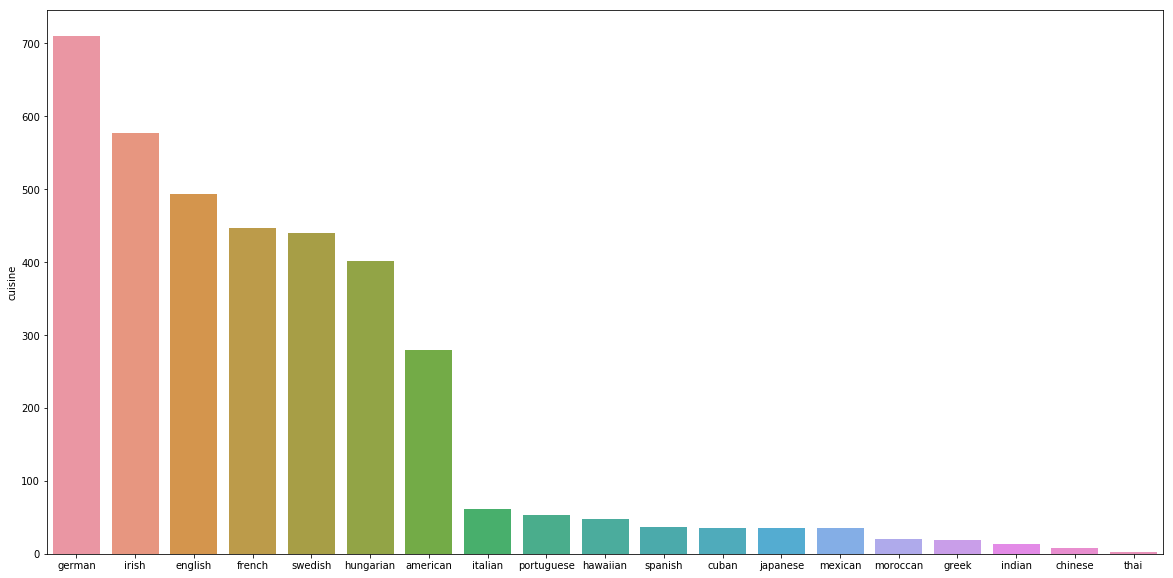

In [70]:
plt.figure(figsize = (20,10))
sns.barplot(x = df_cluster_0.index,y= df_cluster_0['cuisine'],data = df_cluster_0)

# 4. PCA

In [71]:
#visualize

pca_visualize  = KernelPCA(n_components=2, kernel='cosine', n_jobs=-1,random_state=1).fit_transform(data_vectorized)


In [72]:
pca_visualize #pca components



array([[-0.04312081,  0.07955492],
       [ 0.02877495,  0.08018089],
       [-0.04133871,  0.15648956],
       ...,
       [ 0.17235269,  0.11099751],
       [ 0.27659202, -0.06307118],
       [ 0.20351153,  0.01132191]])

In [73]:
principalDf = pd.DataFrame(data = pca_visualize
             , columns = ['principal component 1', 'principal component 2'])

In [74]:
df_pca_analysis = pd.concat([principalDf, df[['cuisine']]], axis=1)
df_pca_analysis.head()

,principal component 1,principal component 2,cuisine
0,-0.043121,0.079555,spanish
1,0.028775,0.080181,spanish
2,-0.041339,0.156490,spanish
3,-0.050880,0.137522,spanish
4,-0.023570,0.028961,spanish


In [75]:
#df_pca_analysis.to_csv('tableau_pca_ingredients.csv') #send to tableau for more vizualizations

<Figure size 1440x720 with 0 Axes>

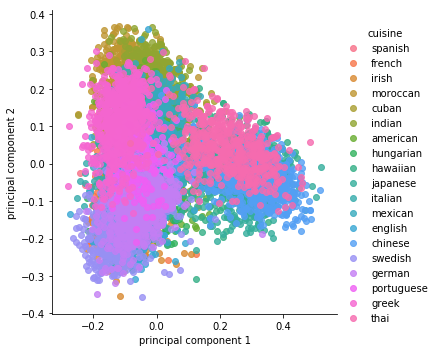

In [76]:
#PCA Analysis on Ingredients
plt.figure(figsize = (20,10))
#sns.set(style="whitegrid", palette="muted")
sns.lmplot("principal component 1", "principal component 2", data=df_pca_analysis, hue = 'cuisine', fit_reg=False)